In [1]:
#Dependencies
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot, pylab
import scipy.stats as stats
import math


In [2]:
#Read in the data
austin_data = pd.read_csv("../../raw data/Austin_merged_data_with_time_deltas.csv")
louisville_data = pd.read_csv("../../raw data/Louisville_with_time_deltas_dogs_cats_only.csv")



In [3]:
austin_data['City']='Austin'
louisville_data['City']='Louisville'

austin_data=austin_data.loc[:,['Days from Intake to Outcome','City']]
louisville_data=louisville_data.loc[:,['Days between Intake and Outcome','City']]

austin_data.head()
louisville_data.head()

,Days from Intake to Outcome,City
0,126.398611,Austin
1,4.138889,Austin
2,0.867361,Austin
3,4.711111,Austin
4,115.961111,Austin


,Days between Intake and Outcome,City
0,5.205556,Louisville
1,9.409722,Louisville
2,0.815278,Louisville
3,10.876389,Louisville
4,10.786111,Louisville


In [4]:
#create lists for boxplot showing intake times for cats vs dogs

austin=[]
louisville=[]

#fill the Louisville list
for row in range(len(louisville_data)):
    if louisville_data.loc[row,'Days between Intake and Outcome']>0:
        louisville.append(louisville_data.loc[row,'Days between Intake and Outcome'])
    else:
        continue

#fill the Austin list
for row in range(len(austin_data)):
    if austin_data.loc[row,'Days from Intake to Outcome']>0:
        austin.append(austin_data.loc[row,'Days from Intake to Outcome'])
    else:
        continue

In [10]:
%%capture

#set up the figure
data=[austin,louisville]
labels=['Austin','Louisville']
pyplot.boxplot(data, labels=labels, showfliers=False)
pylab.title('Days from Intake to Outcome by City (Austin vs Louisville)')
pylab.xlabel("City")
pylab.ylabel("Days from Intake to Outcome")

Means:
Austin: 17.78
Louisville: 13.524

Standard Deviations:
Austin: 38.187
Louisville: 35.283

Medians:
Austin: 5.395
Louisville: 6.019


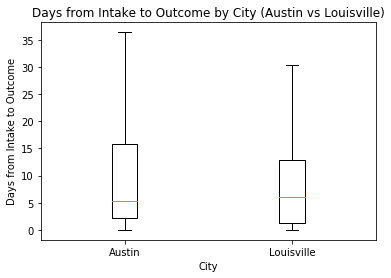

In [11]:
#save box and whiskers plot to PNG file
pyplot.savefig('../figures/time_to_outcome_by_city.png')

print(f"Means:\nAustin: {round(np.mean(austin),3)}\nLouisville: {round(np.mean(louisville),3)}\n")
print(f"Standard Deviations:\nAustin: {round(np.std(austin),3)}\nLouisville: {round(np.std(louisville),3)}\n")
print(f"Medians:\nAustin: {round(np.median(austin),3)}\nLouisville: {round(np.median(louisville),3)}")

#show box and whiskers plot
pyplot.show()

In [8]:
#%%capture
#Is this difference significant? (Probably not, but let's check because we can)

#check for equality of variances (Levene's test)
#and then run t-test based on result

levene=stats.levene(austin,louisville)

print(f"Levene test result: p = {round(levene.pvalue,5)}")
if levene.pvalue < .05:
    print("Assume unequal variances\n\n")
    result=stats.ttest_ind(austin, louisville, equal_var=False)
else:
    print("Assume equal variances\n\n")
    result=stats.ttest_ind(austin, louisville, equal_var=True)    

print("T-test results:")
print(f"t = {round(result.statistic,4)}\nP = {round(result.pvalue,4)}")
if result.pvalue < .05:
    print(f"\nThe difference is significant.")
else:
    print(f"\nThe difference is not significant.")


Levene test result: p = 0.0
Assume unequal variances


T-test results:
t = 22.615
P = 0.0

The difference is significant.


In [53]:
#STATS SUMMARY

print("Austin has a lower median time between intake and outcome compared to Louisville (5.4 vs 6.0).")
print("\nHowever, Austin's mean time is higher (17.8 vs 13.5).\n\nThis difference was statistically significant (t=22.6, p<.01).")

Austin has a lower median time between intake and outcome compared to Louisville (5.4 vs 6.0).

However, Austin's mean time is higher (17.8 vs 13.5).

This difference was statistically significant (t=22.6, p<.01).
